# ASI RESUELVE EL PROFE EL 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pyl
from pylab import imshow,gray,show

In [2]:
def IntSimpBessel(a,b,N,f,M,X):
    h = (b-a)/N
    
    if (N %2 == 0):
        
        I = (f(a,M,X) + f(b,M,X))
        I = I + 4*f(a+(N-1)*h,M,X)
        
        for i in np.arange(1,N/2,1):
            I = I + 4*f(a + (2*i-1)*h,M,X)
            I = I + 2*f(a + 2*i*h,M,X)
            
        I = (h/3)*I
    
    else:
        print("N debe ser par")
        
    return I

def f(theta,M,X):
    return np.cos(M*theta-X*np.sin(theta))
    

def J(m,x):
    S = IntSimpBessel(0,np.pi,1000,f,m,x)
    return (1/np.pi)*S

def I(r,lamb,J,M):
    k = (2*np.pi)/(lamb)
    r = X/k
    I = (J(M,r*k)/k*r)**2
    return I

In [3]:
#X = np.linspace(0,20,100)
#Y = np.linspace(0,20,100)

X = np.linspace(-1e-6,1e-6,500)
Y = np.linspace(-1e-6,1e-6,500)

x,y = np.meshgrid(X,Y)
R = np.sqrt(x**2 + y**2)

Ir = (r,500e-9,J,1)

#imshow(Ir)
#hot(Ir)

NameError: name 'r' is not defined

In [4]:
pyl.imshow(Ir,"hot")

NameError: name 'Ir' is not defined

# OTRA VERSION DEL 3B

Calculando periodos...
a = 0.10, T = 36.4809
a = 0.14, T = 26.2877
a = 0.18, T = 20.5467
a = 0.22, T = 16.8638
a = 0.26, T = 14.3005
a = 0.29, T = 12.4137
a = 0.33, T = 10.9667
a = 0.37, T = 9.8218
a = 0.41, T = 8.8934
a = 0.45, T = 8.1253
a = 0.49, T = 7.4794
a = 0.53, T = 6.9286
a = 0.57, T = 6.4533
a = 0.60, T = 6.0391
a = 0.64, T = 5.6748
a = 0.68, T = 5.3520
a = 0.72, T = 5.0639
a = 0.76, T = 4.8053
a = 0.80, T = 4.5718
a = 0.84, T = 4.3599
a = 0.88, T = 4.1668
a = 0.91, T = 3.9901
a = 0.95, T = 3.8278
a = 0.99, T = 3.6781
a = 1.03, T = 3.5397
a = 1.07, T = 3.4114
a = 1.11, T = 3.2920
a = 1.15, T = 3.1807
a = 1.19, T = 3.0767
a = 1.22, T = 2.9793
a = 1.26, T = 2.8878
a = 1.30, T = 2.8018
a = 1.34, T = 2.7208
a = 1.38, T = 2.6443
a = 1.42, T = 2.5720
a = 1.46, T = 2.5036
a = 1.50, T = 2.4387
a = 1.53, T = 2.3771
a = 1.57, T = 2.3185
a = 1.61, T = 2.2627
a = 1.65, T = 2.2096
a = 1.69, T = 2.1589
a = 1.73, T = 2.1105
a = 1.77, T = 2.0642
a = 1.81, T = 2.0198
a = 1.84, T = 1.9774
a = 

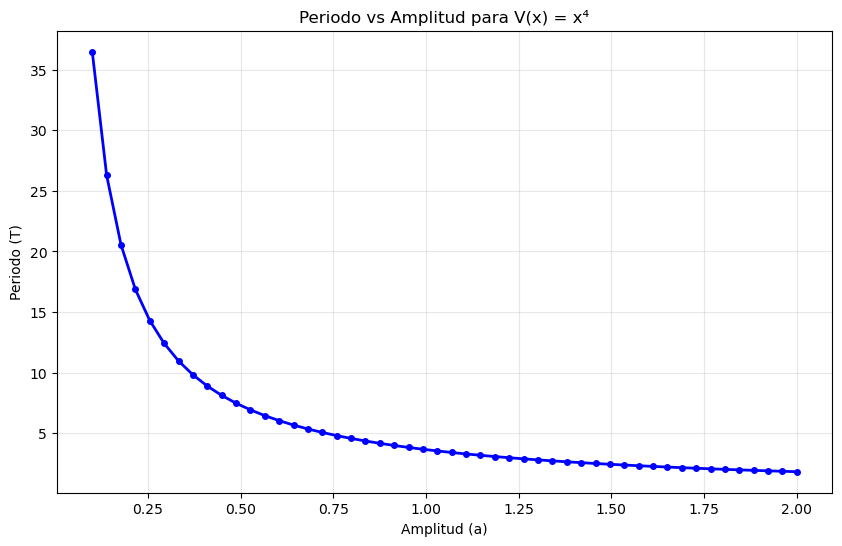


VALORES ESPECÍFICOS:
Amplitud a = 0.5 → Periodo T = 7.2962
Amplitud a = 1.0 → Periodo T = 3.6481
Amplitud a = 1.5 → Periodo T = 2.4321
Amplitud a = 2.0 → Periodo T = 1.8240


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

def periodo_oscilador(a, m=1, N=20):
    """
    Calcula el periodo de un oscilador con potencial V(x) = x^4
    usando cuadratura gaussiana con N puntos
    """
    # Definir el potencial V(x) = x^4
    def V(x):
        return x**4
    
    # Definir la función a integrar: 1/√[V(a) - V(x)]
    def integrando(x):
        # Para evitar división por cero en x = a
        if abs(x - a) < 1e-12:
            return 0
        return 1 / np.sqrt(V(a) - V(x))
    
    # Obtener los puntos y pesos de Gauss-Legendre
    puntos, pesos = roots_legendre(N)
    
    # Transformar del intervalo [-1, 1] a [0, a]
    x_transformados = 0.5 * a * (puntos + 1)
    pesos_transformados = 0.5 * a * pesos
    
    # Calcular la integral
    integral = 0
    for i in range(N):
        integral += pesos_transformados[i] * integrando(x_transformados[i])
    
    # Calcular el periodo: T = √(8m) * integral
    return np.sqrt(8 * m) * integral

# Graficar el periodo para amplitudes de 0 a 2
amplitudes = np.linspace(0.1, 2.0, 50)  # Evitar a=0 exactamente
periodos = []

print("Calculando periodos...")
for a in amplitudes:
    T = periodo_oscilador(a)
    periodos.append(T)
    print(f"a = {a:.2f}, T = {T:.4f}")

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(amplitudes, periodos, 'bo-', linewidth=2, markersize=4)
plt.xlabel('Amplitud (a)')
plt.ylabel('Periodo (T)')
plt.title('Periodo vs Amplitud para V(x) = x⁴')
plt.grid(True, alpha=0.3)
plt.show()

# Mostrar algunos valores específicos
print("\nVALORES ESPECÍFICOS:")
for a in [0.5, 1.0, 1.5, 2.0]:
    T = periodo_oscilador(a)
    print(f"Amplitud a = {a:.1f} → Periodo T = {T:.4f}")

ANÁLISIS DEL COMPORTAMIENTO


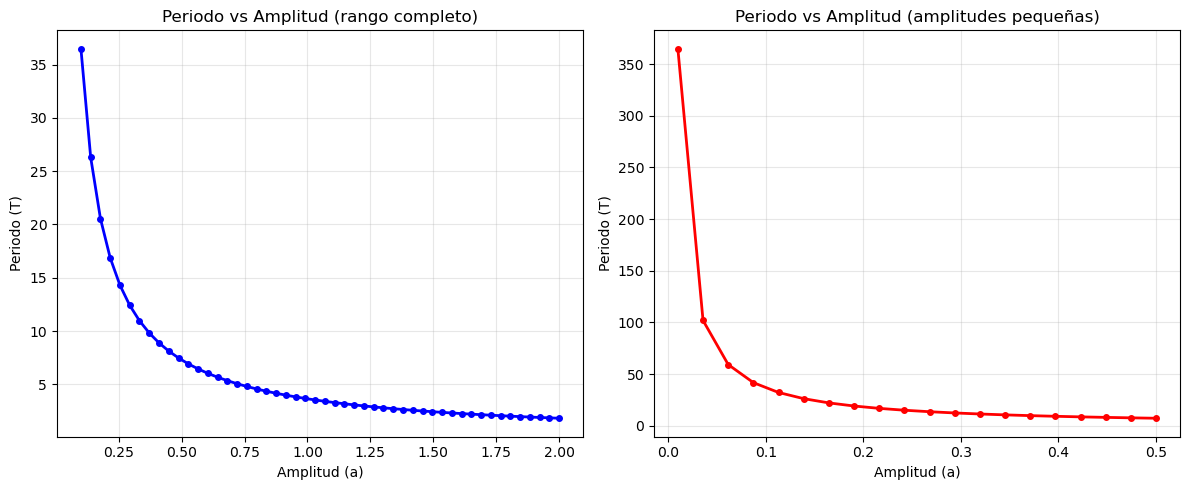


EXPLICACIÓN DE LOS RESULTADOS:
1. EL OSCILADOR SE ACELERA CON AMPLITUD MAYOR:
   - Aunque la partícula recorre más distancia,
     la fuerza F = -dV/dx = -4x³ es mucho más fuerte
     a mayores amplitudes (depende de x³)
   - Esto hace que la partícula se mueva más rápido,
     compensando la mayor distancia recorrida

2. EL PERIODO DIVERGE CUANDO a → 0:
   - Cuando a es muy pequeño, V(a) - V(x) ≈ a⁴ - x⁴ es muy pequeño
   - El integrando 1/√[V(a) - V(x)] se hace muy grande cerca de x = a
   - Esto causa que la integral diverja cuando a → 0
   - Físicamente: cerca del mínimo, el potencial es muy 'plano',
     por lo que la partícula se mueve muy lentamente

COMPARACIÓN CON OSCILADOR ARMÓNICO (V(x) = x²):
   - En el oscilador armónico, el periodo es CONSTANTE
   - En nuestro oscilador anarmónico (V(x) = x⁴),
     el periodo DECRECE con la amplitud
   - Esto muestra cómo la forma del potencial afecta
     dramáticamente la dinámica del sistema

COMPARACIÓN CUANTITATIVA:
Amplitud | Perio

In [3]:
# Análisis del comportamiento del oscilador
print("ANÁLISIS DEL COMPORTAMIENTO")
print("=" * 50)

# Calcular periodos para amplitudes muy pequeñas
amplitudes_pequenas = np.linspace(0.01, 0.5, 20)
periodos_pequenos = [periodo_oscilador(a) for a in amplitudes_pequenas]

plt.figure(figsize=(12, 5))

# Gráfica 1: Comportamiento general
plt.subplot(1, 2, 1)
plt.plot(amplitudes, periodos, 'bo-', linewidth=2, markersize=4)
plt.xlabel('Amplitud (a)')
plt.ylabel('Periodo (T)')
plt.title('Periodo vs Amplitud (rango completo)')
plt.grid(True, alpha=0.3)

# Gráfica 2: Comportamiento para amplitudes pequeñas
plt.subplot(1, 2, 2)
plt.plot(amplitudes_pequenas, periodos_pequenos, 'ro-', linewidth=2, markersize=4)
plt.xlabel('Amplitud (a)')
plt.ylabel('Periodo (T)')
plt.title('Periodo vs Amplitud (amplitudes pequeñas)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Explicación de los resultados
print("\nEXPLICACIÓN DE LOS RESULTADOS:")
print("1. EL OSCILADOR SE ACELERA CON AMPLITUD MAYOR:")
print("   - Aunque la partícula recorre más distancia,")
print("     la fuerza F = -dV/dx = -4x³ es mucho más fuerte")
print("     a mayores amplitudes (depende de x³)")
print("   - Esto hace que la partícula se mueva más rápido,")
print("     compensando la mayor distancia recorrida")

print("\n2. EL PERIODO DIVERGE CUANDO a → 0:")
print("   - Cuando a es muy pequeño, V(a) - V(x) ≈ a⁴ - x⁴ es muy pequeño")
print("   - El integrando 1/√[V(a) - V(x)] se hace muy grande cerca de x = a")
print("   - Esto causa que la integral diverja cuando a → 0")
print("   - Físicamente: cerca del mínimo, el potencial es muy 'plano',")
print("     por lo que la partícula se mueve muy lentamente")

print("\nCOMPARACIÓN CON OSCILADOR ARMÓNICO (V(x) = x²):")
print("   - En el oscilador armónico, el periodo es CONSTANTE")
print("   - En nuestro oscilador anarmónico (V(x) = x⁴),")
print("     el periodo DECRECE con la amplitud")
print("   - Esto muestra cómo la forma del potencial afecta")
print("     dramáticamente la dinámica del sistema")

# Comparación cuantitativa
print("\nCOMPARACIÓN CUANTITATIVA:")
print("Amplitud | Periodo (V=x⁴) | Comportamiento")
print("-" * 45)
for a in [0.1, 0.5, 1.0, 2.0]:
    T = periodo_oscilador(a)
    if a == 0.1:
        print(f"a = {a:.1f}    | T = {T:.2f}       | Muy lento (potencial plano)")
    elif a == 2.0:
        print(f"a = {a:.1f}    | T = {T:.2f}       | Muy rápido (potencial empinado)")
    else:
        print(f"a = {a:.1f}    | T = {T:.2f}       | Intermedio")